Aclaración: La próxima celda es para compatilibidad con Colab, NO ES RECOMENDADO realizar pip install desde un notebook.

In [1]:
import sys

BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'
if 'chardet' not in sys.modules:
    !pip install chardet
if 'sklearn' not in sys.modules:
    !pip install scikit-learn

In [84]:
import ftfy.badness as bad
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from hashlib import md5

from utils import display_markdown

#### Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [3]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [4]:
kd = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(by='name')
print(kd.shape)
kd

(5125, 14)


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329580179,xxx (Canceled),Art,Art,USD,2011-09-03,10000.0,2011-06-05 04:54:37,1151.0,canceled,18,US,1151.00,1151.00,10000.00
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97


#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [5]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

kickstarter_2018['hashed_name'] = kickstarter_2018['name'].astype(str).apply(hashit)

In [6]:
kd = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(by='name')[['name', 'hashed_name']]
print(kd.shape)
kd

(5125, 2)


,name,hashed_name
ID,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
815783250,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
1010584633,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
713417995,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
1880084695,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c
...,...,...
329580179,xxx (Canceled),930857c212f21166427b23d4a7fe52a3
1848699072,NaN,a3d2de7675556553a5f08e4c88d2c228
634871725,NaN,a3d2de7675556553a5f08e4c88d2c228


#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [7]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)

In [8]:
iso_enc_kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
iso_enc_kickstarter_2018['name_weirdness'] = iso_enc_kickstarter_2018['name'].apply(weird)

In [9]:
print('Cantidad en `kickstarter_2018`: {}'.format(len(kickstarter_2018[kickstarter_2018.name_weirdness > 1])))
print('Cantidad en `kickstarter_2018` con codificación ISO-8859-1: {}'.format(len(iso_enc_kickstarter_2018[iso_enc_kickstarter_2018.name_weirdness > 1])))

Cantidad en `kickstarter_2018`: 26
Cantidad en `kickstarter_2018` con codificación ISO-8859-1: 7682


In [10]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [11]:
kickstarter_2018 = kickstarter_2018.fillna(0)

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [12]:
from sklearn import preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(kickstarter_2018.currency)
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [14]:
label_binarizer = preprocessing.LabelBinarizer()
label_binarizer.fit(kickstarter_2018.currency)
pd.DataFrame(label_binarizer.transform(kickstarter_2018.currency),
             columns=(pd.Series(label_binarizer.classes_))).sample(10)

,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
351392,0,0,0,0,0,1,0,0,0,0,0,0,0,0
235982,0,0,0,0,1,0,0,0,0,0,0,0,0,0
302805,0,0,0,0,0,0,0,0,0,0,0,0,0,1
309164,0,0,0,0,0,0,0,0,0,0,0,0,0,1
119473,0,0,0,0,0,0,0,0,0,0,0,0,0,1
93873,0,0,0,0,0,1,0,0,0,0,0,0,0,0
235415,0,0,0,0,0,0,0,0,0,0,0,0,0,1
290366,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10769,0,0,0,0,0,0,0,0,0,0,0,0,0,1
271489,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?

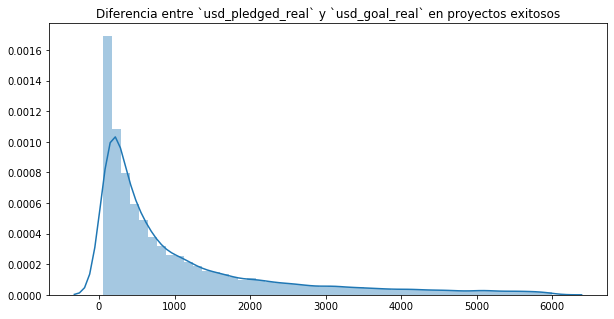

In [119]:
successful_projects = kickstarter_2018[kickstarter_2018.state == 'successful']

usd_diff = (successful_projects.usd_pledged_real - successful_projects.usd_goal_real)
usd_diff_without_outliers = usd_diff[usd_diff.between(usd_diff.quantile(0.15), usd_diff.quantile(0.85))]

plt.figure(figsize=(10, 5))
sns.distplot(usd_diff_without_outliers)
plt.title('Diferencia entre `usd_pledged_real` y `usd_goal_real` en proyectos exitosos');

In [113]:
proj_achieved_goal_prop = len(successful_projects[usd_diff >= 0]) / len(successful_projects)
display_markdown(
    '**{:.4%}** de los proyectos exitosos consiguieron el objetivo, **{:.4%}** no lo hicieron.'.format(
        proj_achieved_goal_prop,
        1 - proj_achieved_goal_prop
    )
)

**99.9963%** de los proyectos exitosos consiguieron el objetivo, **0.0037%** no lo hicieron.

2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [159]:
col_names = ['category', 'state']
groups = kickstarter_2018[col_names].reset_index().groupby(col_names).count()
groups.columns = ['n_projects']
groups.sort_values('n_projects', ascending=False)[:20]

n_projects
category       state                 
Product Design failed           10718
Documentary    failed            8599
Product Design successful        7962
Tabletop Games successful        7866
Food           failed            7119
Video Games    failed            6941
Shorts         successful        6673
Music          successful        6432
               failed            6201
Documentary    successful        5924
Fiction        failed            5875
Film & Video   failed            5554
Fashion        failed            5341
Nonfiction     failed            5184
Apps           failed            4909
Apparel        failed            4752
Shorts         failed            4721
Technology     failed            4409
Theater        successful        4405
Art            failed            4101

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría